# ENPH 353 Lab 2 - Line Detection

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import skimage.measure as m

## Extract Video Information
Here, I create a videoCapture object to capture the frames information from original file and I store it in a 4-dimensional np.array for further analysis.

In [11]:
vidPath = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB2/raw_video_feed.mp4'
vidCap = cv.VideoCapture(vidPath)

# Check if the video file was opened successfully
if not vidCap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Initialize an empty list to store frames
frames = []

# extract the number of frames per second and frame size from original video
fps = int(vidCap.get(cv.CAP_PROP_FPS))
print("fps: " + str(fps))
size = (int(vidCap.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(vidCap.get(cv.CAP_PROP_FRAME_HEIGHT)))
print("frame size (w,h): " + str(size))

# Loop to read frames from the video
while True:
    # Read a frame
    ret, frame = vidCap.read()

    # Check if the end of the video is reached
    if not ret:
        break

    # Append the frame to the list
    frames.append(frame)

# Convert the list of frames to a NumPy array
frames = np.array(frames)

# Release the VideoCapture
vidCap.release()

fps: 15
frame size (w,h): (320, 240)


## Exploration and Visualization of Data

Next, I am trying to break all frames into four groups so visualising them takes less time and I don't have to look at all the frames at the same time. I also randomly checked a few frames and realized that all channels have the same values, so I assumed thats true for all the frames. To reduce computation time, I have only grabbed the first channel instead of averaging or another greyscale method.

In [13]:
frames.shape
frames1 = frames[0:200,:,:,1]
frames2 = frames[200:400,:,:,1]
frames3 = frames[400:600,:,:,1]
frames4 = frames[600:800,:,:,1]

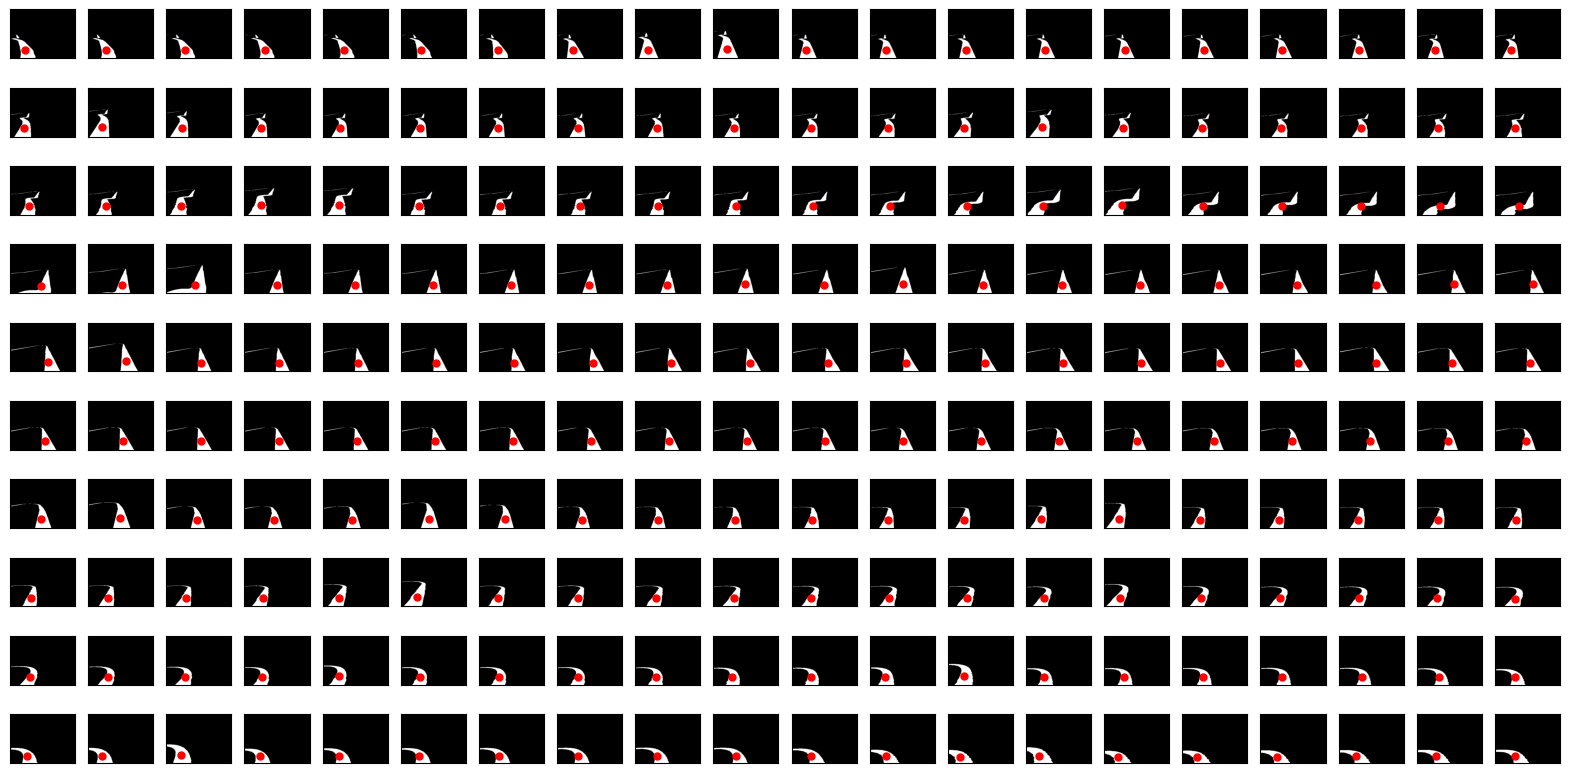

In [7]:
testingfrs = frames1

fig, axs = plt.subplots(10, 20, figsize=(20,10), subplot_kw={'xticks':[], 'yticks':[]})
# plt.subplots_adjust(left=0, right=0.01, top=0.01, bottom=0)

prevCenter = (0,0)
for ax, fr in zip(axs.flat, testingfrs):
  frBN = fr < 90
  frBN = frBN.astype(int)
  regions = m.regionprops(frBN)
  regions.sort(key=lambda x: x.area, reverse=True)
  try:
    roadCntr = regions[0].centroid
    prevCenter = roadCntr
  except:
    roadCntr = prevCenter

  ax.imshow(frBN, cmap='gray')
  ax.plot(roadCntr[1], roadCntr[0], 'ro', markersize=5)

plt.show()

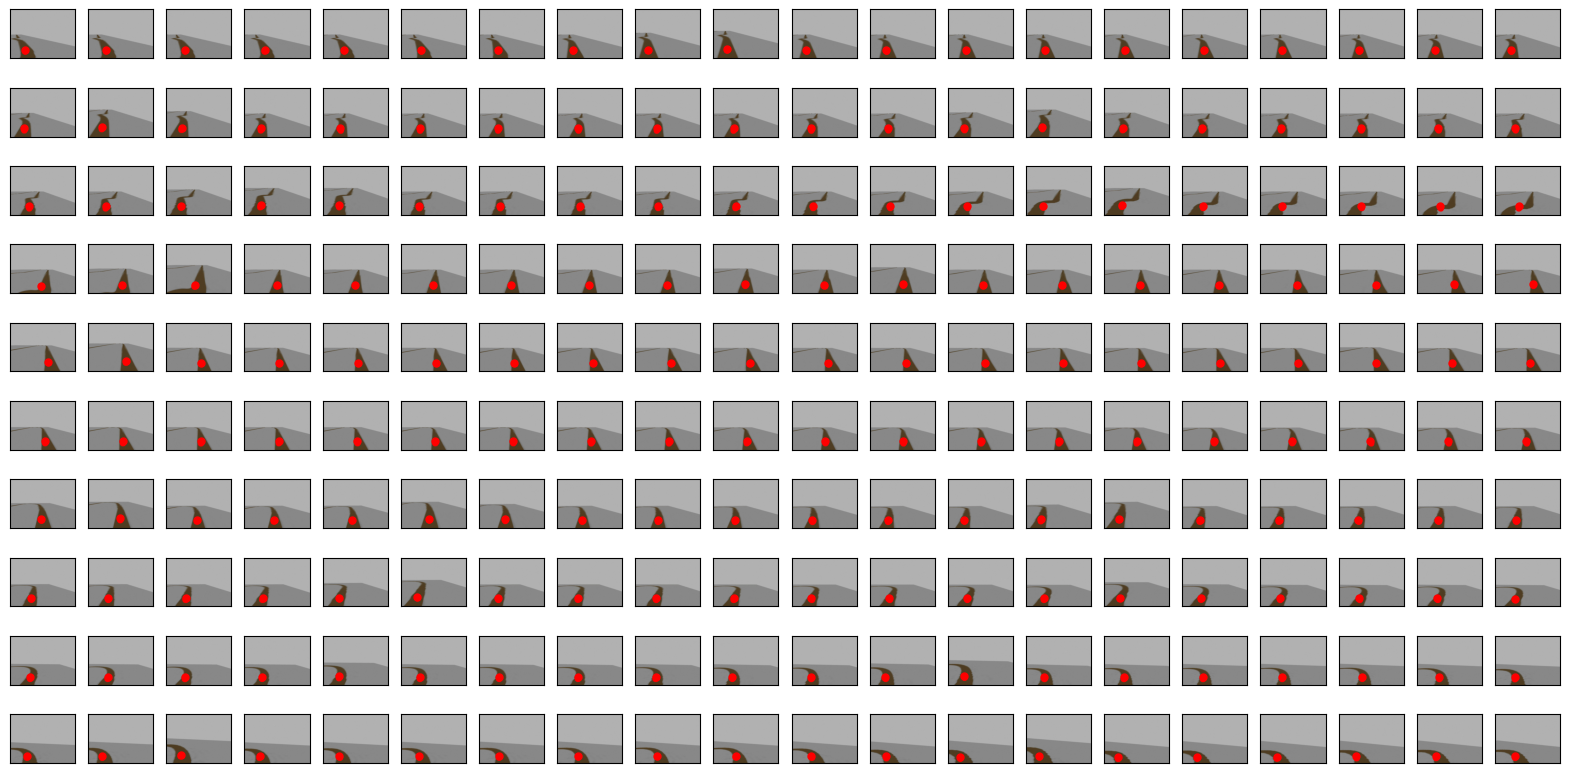

In [14]:
testingfrs = frames3

fig, axs = plt.subplots(10, 20, figsize=(20,10), subplot_kw={'xticks':[], 'yticks':[]})
# plt.subplots_adjust(left=0, right=0.01, top=0.01, bottom=0)

prevCenter = (0,0)
for ax, fr in zip(axs.flat, frames[0:200,:,:,:]):
  frBN = fr[:,:,1] < 90
  frBN = frBN.astype(int)
  regions = m.regionprops(frBN)
  regions.sort(key=lambda x: x.area, reverse=True)
  try:
    roadCntr = regions[0].centroid
    prevCenter = roadCntr
  except:
    roadCntr = prevCenter
  
  newframe = cv.circle(fr, (int(roadCntr[1]), int(roadCntr[0])+10), 15, (255,0,0), -1)

  ax.imshow(newframe)
  ax.plot(roadCntr[1], roadCntr[0], 'ro', markersize=5)

plt.show()

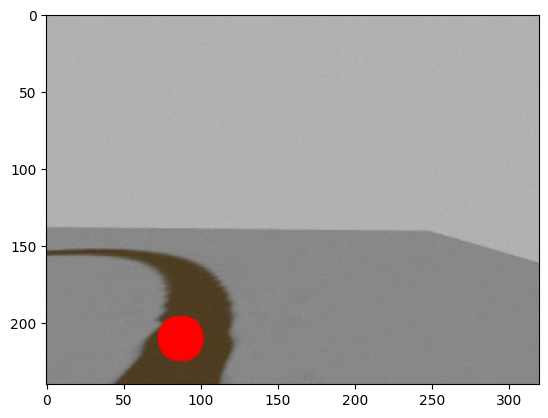

In [5]:
plt.imshow(frames[163,:,:,:])
frB = frames[163,:,:,1] < 90
fr = frames[163,:,:,:]

frBN = frB.astype(int)
regions = m.regionprops(frBN)
regions.sort(key=lambda x: x.area, reverse=True)
roadCntr = regions[0].centroid
newframe = cv.circle(fr, (int(roadCntr[1]), int(roadCntr[0])+10), 15, (255,0,0), -1)
# plt.imshow(newframe, cmap='gray')



## Actual Computation and Video Generation

In [15]:
# initialize the video writer object
vidWriter = cv.VideoWriter('C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB2/processed_video.mp4',
                           cv.VideoWriter_fourcc(*'MP4V'), fps, size)

prevCenter = (0,0)
for fr in frames:
  frBN = fr[:,:,1] < 90
  frBN = frBN.astype(int)
  regions = m.regionprops(frBN)
  regions.sort(key=lambda x: x.area, reverse=True)
  try:
    roadCntr = regions[0].centroid
    prevCenter = roadCntr
  except:
    roadCntr = prevCenter
  
  newframe = cv.circle(fr, (int(roadCntr[1]), int(roadCntr[0])+10), 15, (0,0,255), -1)

  vidWriter.write(newframe)

vidWriter.release()

print("Done! Nice work!")

Done! Nice work!
